# Task 1: Density Plot

##  1.1 Plot the longitude vs latitude several ways within a single figure (each in its own axes):

## Latitude and Longitde are system of lines used to describe the location of any place on Earth. Lines of Latitude run in an East - West direction acros Earth. And Lines of Longitude run in a North - South direction.

### Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### Reading the VIIRS I-Band 375 m Active Fire Data Sets

The Visible Infrared Imaging Radiometer Suite (VIIRS) 375 m thermal anomalies / active fire product provides data from the VIIRS sensor aboard the joint NASA/NOAA Suomi National Polar-orbiting Partnership (Suomi NPP) and NOAA-20 satellites. The 375 m data complements Moderate Resolution Imaging Spectroradiometer (MODIS) fire detection; they both show good agreement in hotspot detection but the improved spatial resolution of the 375 m data provides a greater response over fires of relatively small areas and provides improved mapping of large fire perimeters. The 375 m data also has improved nighttime performance. Consequently, these data are well suited for use in support of fire management (e.g., near real-time alert systems), as well as other science applications requiring improved fire mapping fidelity.

In [2]:
data = pd.read_csv('VIIRS.csv')
data.shape
data.head()
#data.tail()

(956257, 14)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


### Drawing a Subplot for Longitude vs Latitude

### The first plot uses matplotlib defaults, the second one uses marker size and alpha to deal with overplotting. The third plot uses hexbin and the last one uses a sample from the dataframe to plot the scatter graph.

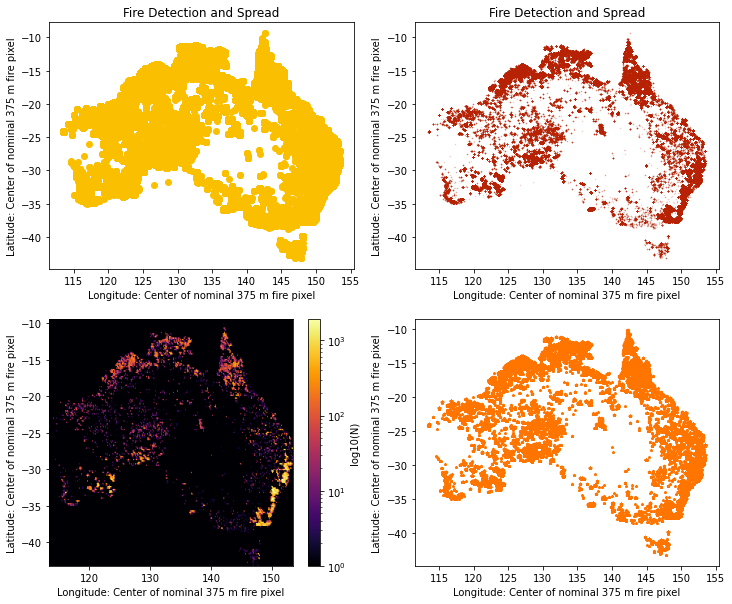

In [28]:
x = data['longitude']
y = data['latitude']

plt.figure(figsize=(12,10))

x_min = min(x)
y_min = min(y)
x_max = max(x)
y_max = max(y)

ax11 = plt.subplot(2, 2, 1)
ax11.set_xlabel('Longitude: Center of nominal 375 m fire pixel')
ax11.set_ylabel('Latitude: Center of nominal 375 m fire pixel')
ax11.set_title('Fire Detection and Spread')
ax11.scatter(x, y, color='#FAC000')

ax21 = plt.subplot(2,2,2)
ax21.set_xlabel('Longitude: Center of nominal 375 m fire pixel')
ax21.set_ylabel('Latitude: Center of nominal 375 m fire pixel')
ax21.set_title('Fire Detection and Spread')
ax21.scatter(x, y, marker='.', alpha=0.21, s=1, color='#B62203')

ax12 = plt.subplot(2, 2, 3)
ax12.set_xlabel('Longitude: Center of nominal 375 m fire pixel')
ax12.set_ylabel('Latitude: Center of nominal 375 m fire pixel')
#ax12.set_title('Fire Detection and Spread')
ax12.set(xlim=(x_min,x_max), ylim=(y_min,y_max))
plt.hexbin(x, y, gridsize=300, bins='log', cmap='inferno', extent=(x_min, x_max, y_min, y_max))
cb = plt.colorbar()
cb.set_label('log10(N)')
#plt.axis("off")

# create random sample from the dataframe
sample = data.sample(frac=0.2)
x_sample = sample['longitude']
y_sample = sample['latitude']
ax22 = plt.subplot(2, 2, 4)
ax22.set_xlabel('Longitude: Center of nominal 375 m fire pixel')
ax22.set_ylabel('Latitude: Center of nominal 375 m fire pixel')
#ax22.set_title('Fire Detection and Spread')
ax22.scatter(x_sample, y_sample, marker='*', s=6, color='#FF7500')
plt.show();

## 1.2 Areas where  most of the anomalies (measurements) are located

Maximum number of fires can be observed on the south-eastern part of Australia. This is evident from the hexbin map.

# Task 2: Visualizing Class Membership

*Visualizing the distribution of Brightness temperature I-4 as a histogram (with appropriate settings). 

*Assuming we are certain of a fire if the value of temperature I-4 is saturated as visible from the histogram.

*Brightness temperature I-4: is the VIIRS I-4 channel brightness temperature of the fire pixel measured in Kelvin.

### Plotting the histogram for Brightness I-4 temperature

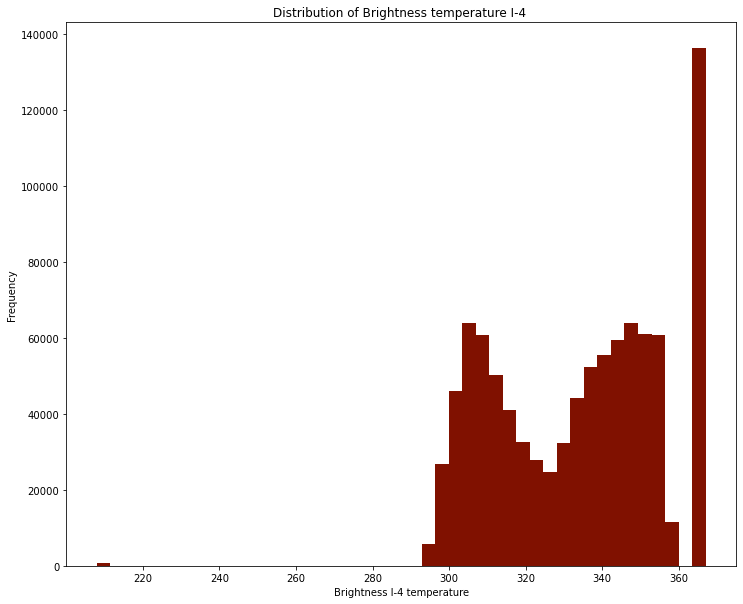

In [42]:
brightness_temperature = data['bright_ti4']
plt.figure(figsize=(12,10))
plt.hist(brightness_temperature, bins=45, histtype='stepfilled', color='#801100')
plt.title('Distribution of Brightness temperature I-4 ')
plt.xlabel('Brightness I-4 temperature')
plt.ylabel('Frequency');

*Left side of the plot: showing areas in Australia where brightness temperature was saturated as indicated by the last bar on the histogram

*Right side of the plot: showing areas in Australia where brightness temperature was less than the maximum brightness temperature.

## 2.1 Spotting the difference in distribution using Density plot 

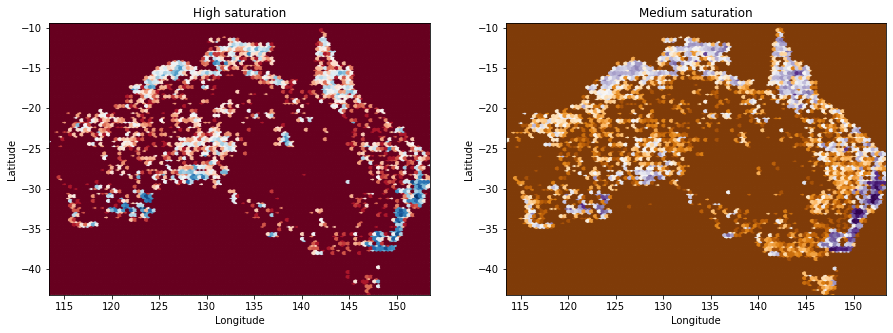

In [57]:
# isolate data points that have highest value for brightness temperature from the rest of the data
max_temp = max(data['bright_ti4'])
high_sat_values = data.loc[data['bright_ti4'] >= max_temp]
x_high = high_sat_values['longitude']
y_high = high_sat_values['latitude']

low_aat_values = data.loc[data['bright_ti4'] < max_temp]
x_low = low_aat_values['longitude']
y_low = low_aat_values['latitude']

plt.figure(figsize=(15,5))

x_min = min(x_low)
y_min = min(y_low)
x_max = max(x_high)
y_max = max(y_high)


ax11 = plt.subplot(1, 2, 1)
ax11.set_xlabel('Longitude')
ax11.set_ylabel('Latitude')
ax11.set(xlim=(x_min,x_max), ylim=(y_min,y_max))
plt.hexbin(x_high, y_high, bins='log', cmap='RdBu', extent=(min(x_high), max(x_high), min(y_high), max(y_high)))
ax11.set_title('High saturation')

ax12 = plt.subplot(1, 2, 2)
ax12.set_xlabel('Longitude')
ax12.set_ylabel('Latitude')
ax12.set(xlim=(x_min,x_max), ylim=(y_min,y_max))
plt.hexbin(x_low, y_low, bins='log', cmap='PuOr', extent=(min(x_low), max(x_low), min(y_low), max(y_low)))
ax12.set_title('Medium saturation')

plt.show();

*We can see from the hexbin plots that distribution for temperatures less than saturation are more densely distributed.

## 2.2 Plotting both series on the same axes.

*Plot both groups in the same axes with different colors

*changing the order of plotting the two classes (i.e. draw the saturated first then the non-saturated or the other way around)

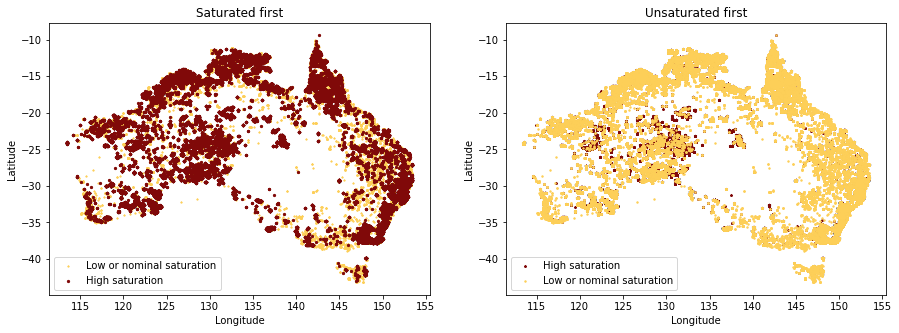

In [59]:
plt.figure(figsize=(15,5))

ax11 = plt.subplot(1, 2, 1)
ax11.scatter(x_low, y_low, marker='*', s=2, c='#fdcf58')
ax11.scatter(x_high, y_high, marker='o', s=5, c='#800909')
ax11.set_xlabel('Longitude')
ax11.set_ylabel('Latitude')
ax11.legend(['Low or nominal saturation', 'High saturation'])
ax11.set_title('Saturated first')

ax12 = plt.subplot(1, 2, 2)
ax12.set_xlabel('Longitude')
ax12.set_ylabel('Latitude')
ax12.scatter(x_high, y_high, marker='*', s=5, c='#800909')
ax12.scatter(x_low, y_low, marker='o', c='#fdcf58', s=2)
ax12.legend(['High saturation', 'Low or nominal saturation'])
ax12.set_title('Unsaturated first')


plt.show();


####  From the map it looks like the concentration of fires is at the South-Eastern Region, but Northern and Central Regions are also affected

*Points with high saturation temperatures are lower in number than points with lesser temperature.

*From the plots it is clear that saturated data points should be shown on top of unsaturated points, otherwise it is not possible to observe their impact, as shown in the figure on the right.

*However, the plot on the left seems to suggest that number of data points with high saturation temperature is higher than low/nominal, which is not true.

## 2.3 Finding a better way to compare the distributions

*One approach is to have the high saturation values on top of low saturation points, but assign low alpha value to the high saturation coordinates

#### The following figure validates the earlier observation from the hexbin plots that suggested that high saturation temperatures were concentrated in the south-eastern parts of Australia

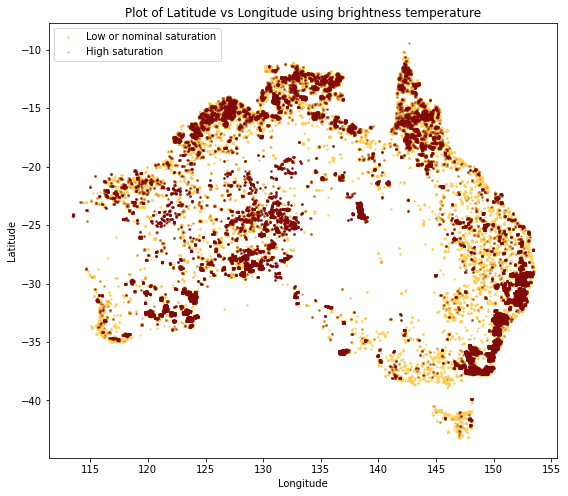

In [65]:
plt.figure(figsize=(20,8))


ax11 = plt.subplot(1, 2, 1)
ax11.scatter(x_low, y_low, marker='*', s=2, c='#fdcf58')
ax11.scatter(x_high, y_high, marker='o', s=2, c='#800909', alpha=0.2)
ax11.set_xlabel('Longitude')
ax11.set_ylabel('Latitude')
ax11.legend(['Low or nominal saturation', 'High saturation'])
ax11.set_title('Plot of Latitude vs Longitude using brightness temperature')
plt.show();

*Since the high saturation points are plotted over the low/nominal saturation points, they are more prominent by default

*So, I have reduced their visual prominence by adding a low alpha value to it.

*This allows us to visualize both series together wothout a loss of perception about the either set of data and at the same time ensures that we pay attention to the data points which show a high concentration of saturated temperature points (like in the south-eastern region).